### Handling Imbalanced Dataset

1. Up Sampling 
2. Down Sampling

In [2]:
import numpy as np
import pandas as pd 

# Set the random seed for reproducibility 
np.random.seed(123)

# Create a dataframe wit two classes 
n_samples=1000 
class_0_ratio=0.9
n_class_0= int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET 
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df['target'].value_counts()


target
0    900
1    100
Name: count, dtype: int64

In [8]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [9]:
from sklearn.utils import resample 
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)#Sample With replacement 


In [10]:
df_minority_upsampled.shape

(900, 3)

In [11]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1


In [12]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [13]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [14]:
## Down sampling

import numpy as np
import pandas as pd 

# Set the random seed for reproducibility 
np.random.seed(123)

# Create a dataframe wit two classes 
n_samples=1000 
class_0_ratio=0.9
n_class_0= int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

## CREATE MY DATAFRAME WITH IMBALANCED DATASET 
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [15]:
## downsampling 
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [16]:
from sklearn.utils import resample 
df_majority_downsampled=resample(df_majority,n_samples=len(df_minority),random_state=42)

In [17]:
df_majority_downsampled.shape

(100, 3)

In [18]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [19]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Oversampling Technique) is a technique used in machine learning used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [20]:
from sklearn.datasets import make_classification 

In [21]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12,n_redundant=0)

In [22]:
import pandas as pd 
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [23]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

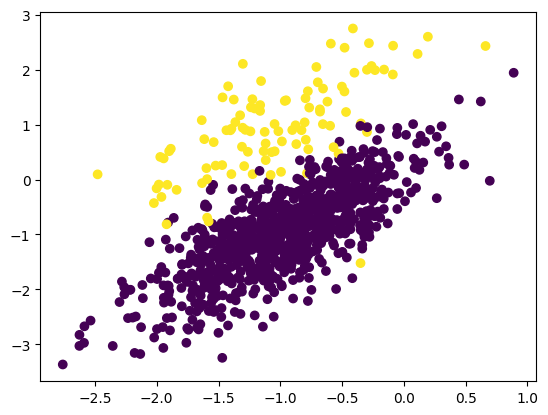

In [24]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [26]:
from imblearn.over_sampling import SMOTE


In [28]:
## transform the dataset 
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [29]:
X.shape

(1800, 2)

In [31]:
len(y[y==0])

900

In [32]:
len(y[y==1])

900

In [34]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

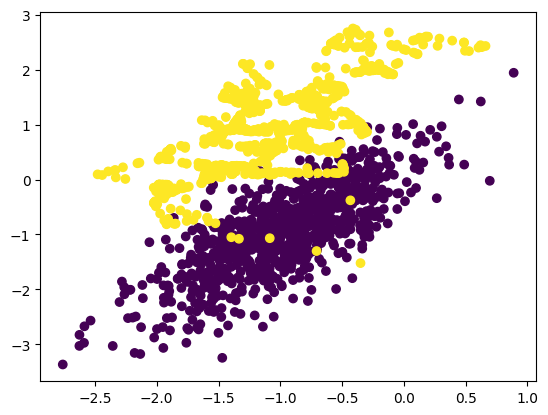

In [35]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])